# I digressed. Here's a lot of *rants* about SVCs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
getx = lambda l: [p[0] for p in l]
gety = lambda l: [p[1] for p in l]

line_points = np.array([
    [0, 4],
    [5, 0]
])
pos_points = np.array([
    [4, 2],
    [3.3, 3.3],
    [3, 2.5],
    [2, 3]
])
neg_points = np.array([
    [1.8, 2],
    [1, 1],
    [2.5, 0.7]
])

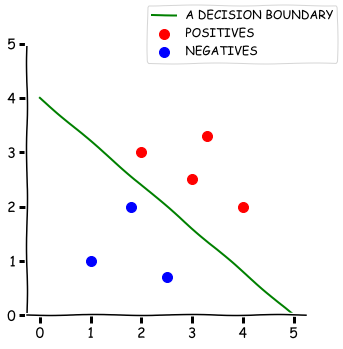

In [107]:
with plt.xkcd(scale=0.5, ):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.subplots()

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_ylim(0, 5)

    ax.plot(line_points[:, 0], line_points[:, 1], label='A DECISION BOUNDARY', color='green')
    ax.scatter(pos_points[:, 0], pos_points[:, 1], label='POSITIVES', color='red', s=100)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], label='NEGATIVES', color='blue', s=100)

    fig.legend(loc='upper right', prop={'size': 12})

We're trying to build a classifier to separate the positives from negatives. Some important things to keep in mind:
1. Our classifier is linear.
2. The points MUST be perfectly linearly separable. Shit will break otherwise.

Now, there can be many different classifiers (i.e. boundaries) to separate the two points. How would you start defining what's the best one?

Well, one way is to think how "confident" would you feel about classifying the points once a bounday has been picked. Naturally, you would feel more confident for points that are far away from the boundary. This leads to a bounday definition which is furthest from all possible points **while also classifying them correctly**. That last part's *really* important.

We'll reformulate this intuition more concretely later.

The parametric equation of this boundary is $\frac{x}{5} + \frac{y}{4} = 1$. Any point (or vector starting from origin) that lies on the line has to follow the specific condition.

$$
\begin{align}
& \textbf{w}.\textbf{x} + b = 0 \\
& \text{where } \textbf{w} = [4, 5] \text{ and } b = -20
\end{align}
$$

What about points that are not on the line though? Does it make sense that if a random point $\textbf{x}_r$ is to the right of the boundary, then the expression $\textbf{w}.\textbf{x}_r + b$ will be greater than $0$?

No? Let's draw that figure again with the normal against the boundary and focus on point $A (4, 2)$.

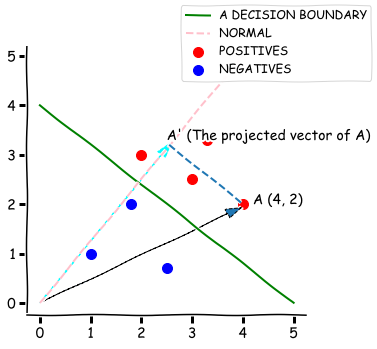

In [145]:
with plt.xkcd(scale=0.5, ):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.subplots()

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.plot(line_points[:, 0], line_points[:, 1], label='A DECISION BOUNDARY', color='green')
    ax.scatter(pos_points[:, 0], pos_points[:, 1], label='POSITIVES', color='red', s=100)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], label='NEGATIVES', color='blue', s=100)

    ax.plot([0, 4], [0, 5], color='pink', label='NORMAL', ls='dashed')

    ax.annotate("A (4, 2)", (4.2, 2))
    ax.arrow(0, 0, 3.7, 1.8, head_width=0.2, ls='dashed', label="A vector")
    
    ax.plot([2.55, 4], [3.2, 2], ls='--')
    ax.arrow(0, 0, 2.4, 3, label='PROJECTED LENGTH OF A', ls='dashed', head_width=0.2, color='cyan')
    
    ax.annotate("A' (The projected vector of A)", (2.5, 3.3))
    
    fig.legend(loc='upper right', prop={'size': 12});

One way to figure out if a point is *above* or *below* the line is to project it onto the normal. Note that the length of the projected vector $A'$ will be a constant $c$ times the unit vector in the normal direction.

$$
\text{projected length} = c \times \frac{\vec{n}}{\|\vec{n}\|}
$$

The relation b/w the projected vector $A'$ and original vector $A$ is $\cos\theta$, where $\theta$ is the angle b/w them.

$$
\begin{align}
&\cos\theta = \frac{c}{\|A\|} \\
&\implies \frac{n.A}{\|n\| \|A\|} = \frac{c}{\|A\|} \\
&\implies c = \frac{n.A}{\|n\|}
\end{align}
$$

And what is our normal vector $\vec n$? Well, it's $[4, 5]$... which is the same as $\textbf{w}$.

![curious](http://www.quickmeme.com/img/b8/b8e44188ca632c697bc840fc4188584164ac5bcdfee2044c87cb7275af5c3789.jpg)

That gives us a value of $\frac{26}{\sqrt{41}}$

Okay. Cool. So we can figure out the projection length using that. Let's say I have the projection length, then what? Since we're considering all projections onto the normal, we could check the scalar length of where the normal intersects the boundary and see if our scalar $c$ is greater than that value.

How do we find the length to the intersection of the normal? Why not take the projection of a point which lies on the boundary, say $[5, 0]$?. This gives us a value of $\frac{20}{\sqrt{41}}$.

So, positive points will be those whose projected lengths - $\frac{20}{\sqrt{41}}$ > 0. 

But, the projected length is given by $\frac{n.A}{\|n\|}$. For normal vector $\textbf{w}$ and an arbitrary vector $\textbf{x}$, this becomes

$$
\begin{align}
& \frac{\textbf{w}.\textbf{x}}{\|\textbf{w}\|} - \frac{20}{\|\textbf{w}\|} > 0 \\
& \text{But... $b$ was -20}. \\
& \implies \textbf{w}.\textbf{x} + b > 0 \\
& \text{or $< 0$ when the point is below the line.}
\end{align}
$$

![curious](http://www.quickmeme.com/img/b8/b8e44188ca632c697bc840fc4188584164ac5bcdfee2044c87cb7275af5c3789.jpg)

For the positive points ($x_p$, label $+1$), we can define a boundary such that $w.x_p + b = 1$, so that all positive points are on or above this boundary. Similarly, for negative points ($x_n$, label $-1$), we can define another bounday such that $w.x_n + b = -1$.

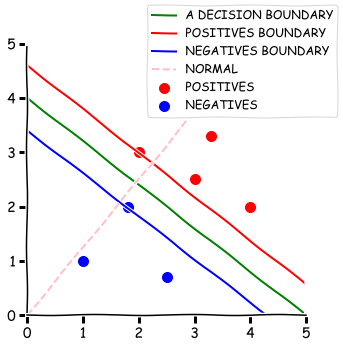

In [185]:
with plt.xkcd(scale=0.5, ):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.subplots()

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.plot(line_points[:, 0], line_points[:, 1], label='A DECISION BOUNDARY', color='green')
    ax.plot([0, 5.7], [4.6, 0], label='POSITIVES BOUNDARY', color='red')
    ax.plot([0, 4.3], [3.4, 0], label='NEGATIVES BOUNDARY', color='blue')

    ax.scatter(pos_points[:, 0], pos_points[:, 1], label='POSITIVES', color='red', s=100)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], label='NEGATIVES', color='blue', s=100)

    ax.plot([0, 4], [0, 5], color='pink', label='NORMAL', ls='dashed')

    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)

    fig.legend(loc='upper right', prop={'size': 12});

The difference b/w these boundaries (again, along the normal) will be $\frac{2}{\|w\|}$. You can confirm this by taking the projections of a point on each of the lines and then subtracting them.

The optimisation problem is to find the optimal $w, b$ which maximize this distance, which is the same as minimizing $\|w\|$, or $\|w\|^2$. While maximizing this distance, we also want to constraint the estimation so that all the labels are correct.

$$
\begin{align}
&\text{For positives: } w.x_p + b >= 1 \\
&\text{For negatives: } w.x_n + b <= -1 \\ \\
&\text{Combined: }\\ \\
&\text{Minimize } \frac{1}{2} \|w\|^2 \\
&\text{s.t.} \\
& - y_i(w.x_i + b) + 1 \leq 0
\end{align}
$$

This can be given to any quadratic solver, and we'll get the answer for $w, b$.

But... what's the support vector????

Turns out the story does not end here. 

What we've defined above is the **primal problem**. We can go one step further, and use Lagrange Multipliers to combine the objective and the constraints. We'll get a single multiplier $\alpha_i$ for every (point)constraint.

$$
L(w, b, \alpha) = \frac{1}{2}\|w\|^2 - \sum_{i=1}^m \alpha_i [y_i(w.x_i + b) - 1]
$$

The solution $d^*$ for the **dual formulation** for the Lagrangian goes like this :

$$
d^* = \underset{\alpha : \alpha_i \geq 0}{\text{max}}\ \underset{w}{\text{min}}\ L(w, b, \alpha)
$$

We minimize $w$ and then the $\alpha$ multipliers. The primal solution $p^*$ to the lagrangian is the same expression but $\text{min max}$ instead of $\text{max min}$.

But why do we care so much about this Primal-Dual stuff? Two main reasons:
1. The idea of Support Vectors comes from this Primal-Dual stuff. Wikiepedia has a simple proof which shows why $d^* \leq p^*$. These two solutions are equal under some specific conditions -- the objective function and the LTE-constraints should be convex, which is the case for us. Also, when this happens, the variables involved in the optimisation ($w, b, \alpha$ in our case) satisfy the KKT conditions.

For a general optimisation problem:
$$
\text{min}_w\ f(w)\\
\text{s.t. } g_i(w) \leq 0
$$

where $f = \frac{1}{2}\|w\|^2$ and $g_i = -y_i(w.x_i + b) + 1$ and $\alpha_i$ are the Lagrange multipliers, two of the KKT conditions state:
$$
\begin{align}\\
\alpha_i^* g_i(w) &= 0, \ i = 1, ..., k\\
\alpha_i^* &\geq 0, \ i = 1, ..., k
\end{align}
$$

The value for $g_i$ will be $0$ ONLY on the margins, which means for all points not on the margin, $\alpha_i$ has to be $0$. Those non-zero $\alpha_i$ points which lie on the margins ARE the support vectors -- the constraints are considered only for these points, rest are ignored because the $\alpha_i$ will be $0$.

2. The entire Dual-Solution can be expressed using dot-products b/w the feature vectors. This is cricual for applying the Kernel trick.

3. The **SMO Algorithm** for the Dual-Solution is a more efficient way of solving the SVM. Also, the KKT conditions will be used for the convergence test in the SMO. 